In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (15,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

Use some matrix... just check if it trains and if so how quickly

In [4]:
from movieLensAnalyzer import MovieLensAnalyzer 
movieLensAnalyzer = MovieLensAnalyzer()
R = movieLensAnalyzer.trainRatingMatrix

In [5]:
R_test = movieLensAnalyzer.testRatingMatrix

---

Our model.

Note we haven't fully cross validated yet, so the result is not be optimal.

In [6]:
from nnmf import NNMF
model = NNMF(ratingMatrix=R)

---

Evaluation code. We'll look at the output for an arbituary user.

First, we look at the prior Rhats.

User 11


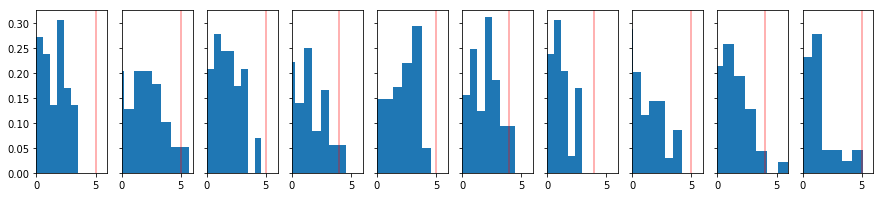

Rhats : [ 1.  2.  1.  1.  2.  1.  0.  0.  1.  0.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [12.962600707346196]
CPU times: user 2.11 s, sys: 132 ms, total: 2.25 s
Wall time: 1.63 s


In [7]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r', alpha=0.4)
        axes[j].hist(rhats[:,j], histtype='stepfilled', normed=True)
    plt.xlim([0,6])
    f.suptitle(title)
    plt.show()

TEST_USERS = [11]
    
def score():
    # For now, just some mse of random users.
    mses = []
    for user_index in TEST_USERS:
        print('User', user_index)
        idx = np.where(R[user_index] > 0)
        samples = np.squeeze(model.sample_for_user(user_index, 50)[:,idx])
        rhats = np.mean(samples, axis=0)
        r = R[user_index][idx]
        plot_R(samples[:,:10], r[:10])
        print("Rhats :", np.round(rhats[:10]))
        print("Actual:", r[:10])
        mses.append(np.mean(np.square(rhats - r)))
    print("MSE per user", mses)

%time score()

Train, and look at posterior Rhats, as well as the MSE for each of our chosen users.

In [8]:
mask = R>0

1000/1000 [100%] ██████████████████████████████ Elapsed: 56s | Loss: 2371598.750
CPU times: user 2min 8s, sys: 15.1 s, total: 2min 23s
Wall time: 44.6 s
User 11


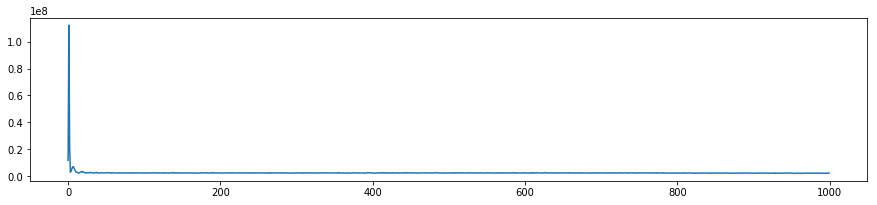

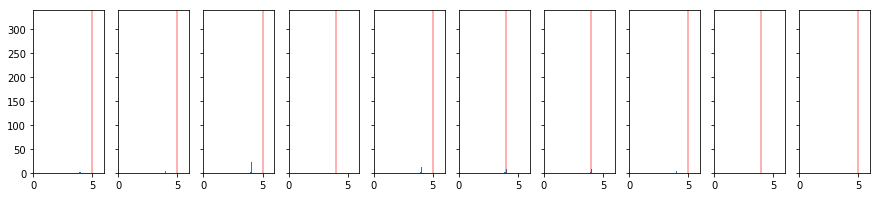

Rhats : [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [0.70193791170533237]


In [9]:
%time losses = model.train(legalTrainIndices=mask)
plt.plot(losses)
score()

---

Test save, load, reset.

In [10]:
model.save('blah.pkl') # We save as pickles. It would be better (for style) if you use the .pkl extension.

'blah.pkl'

In [11]:
model.reset()

User 11


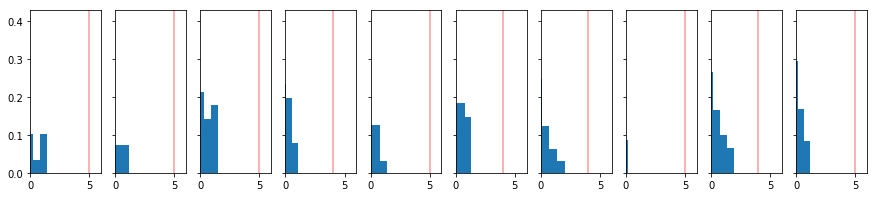

Rhats : [-2. -2. -1. -2. -2. -1. -1. -3. -1. -1.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [37.204741218155213]


In [12]:
score()

In [13]:
model.load('blah.pkl')

User 11


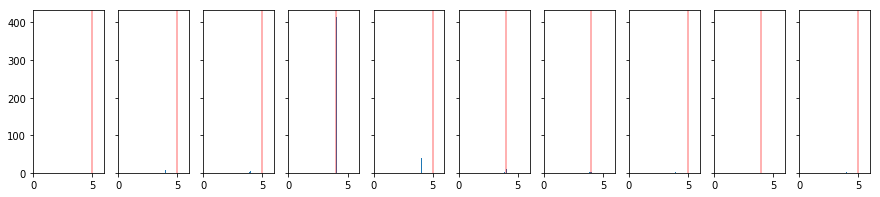

Rhats : [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [0.70540447904961612]


In [14]:
score()

---

Test Seed

In [15]:
model.reset(seed=10)

User 11


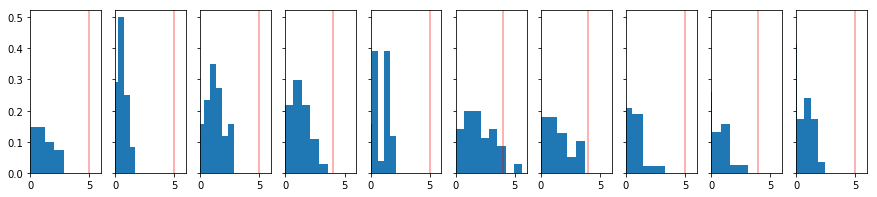

Rhats : [-1. -0.  0.  0. -0.  1. -0. -1. -1. -0.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [24.22208202182242]


In [16]:
score()

  10/1000 [  1%]                                ETA: 1244s | Loss: 3165554.000  User 11


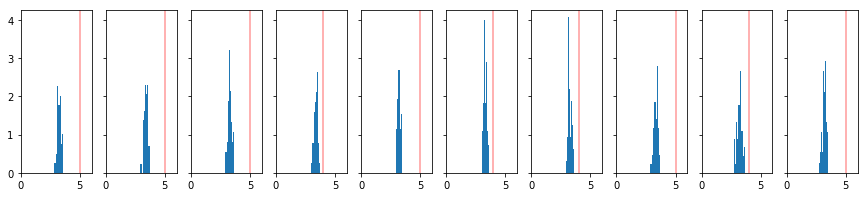

Rhats : [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [1.7627669354852531]


In [17]:
model.train(legalTrainIndices=mask, n_iter=10)
score()

We expect the result after setting the seed again to be the same:

In [18]:
model.reset(seed=10)

User 11


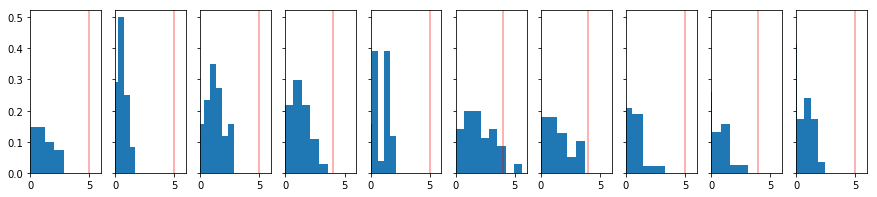

Rhats : [-1. -0.  0.  0. -0.  1. -0. -1. -1. -0.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [24.22208202182242]


In [19]:
score()

  10/1000 [  1%]                                ETA: 1720s | Loss: 3182056.750  User 11


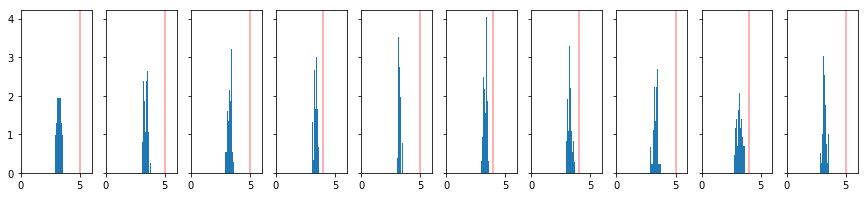

Rhats : [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
Actual: [ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
MSE per user [1.7646955050821522]


In [20]:
model.train(legalTrainIndices=mask, n_iter=10)
score()